In [284]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load country metadata and produce mapping between Continents and Countries within population data

In [191]:
country_metadata = pd.read_csv('data/raw_data/FAOSTAT_data_11-19-2019.csv')
population_df = pd.read_csv('data/raw_data/Population_E_All_Data_(Normalized).csv', encoding='latin-1')

In [192]:
country_metadata.head()

,Country Group Code,Country Group,Country Code,Country,M49 Code,ISO2 Code,ISO3 Code
0,5100,Africa,4,Algeria,12.0,DZ,DZA
1,5100,Africa,7,Angola,24.0,AO,AGO
2,5100,Africa,53,Benin,204.0,BJ,BEN
3,5100,Africa,20,Botswana,72.0,BW,BWA
4,5100,Africa,233,Burkina Faso,854.0,BF,BFA


In [193]:
countries = country_metadata.Country.drop_duplicates().values

In [194]:
continents = country_metadata[(country_metadata['Country Group Code']>5000) 
                              & (country_metadata['Country Group Code']%100==0)]
continents = continents['Country Group'].drop_duplicates().values

In [195]:
country_populations = population_df[(population_df.Area.isin(countries)) 
                                    & (population_df.Element=='Total Population - Both sexes')].copy()
country_populations['Population'] = country_populations.Value * 1000
country_populations = country_populations[['Area', 'Year', 'Population']]
country_populations.head()

,Area,Year,Population
0,Afghanistan,1950,7752120.0
1,Afghanistan,1951,7839510.0
2,Afghanistan,1952,7934980.0
3,Afghanistan,1953,8038600.0
4,Afghanistan,1954,8150450.0


In [196]:
country_to_continent = country_metadata[country_metadata['Country Group'].isin(continents)]
country_to_continent = country_to_continent[['Country Group', 'Country']]

In [197]:
cc_population_df = pd.merge(country_populations, country_to_continent, 
                            left_on='Area', right_on='Country', how='inner')
cc_population_df = cc_population_df[['Year', 'Country Group', 'Country', 'Population']]
cc_population_df = cc_population_df.rename(columns={'Country Group': 'Continent'})

In [198]:
cc_population_df.head()

,Year,Continent,Country,Population
0,1950,Asia,Afghanistan,7752120.0
1,1951,Asia,Afghanistan,7839510.0
2,1952,Asia,Afghanistan,7934980.0
3,1953,Asia,Afghanistan,8038600.0
4,1954,Asia,Afghanistan,8150450.0


In [112]:
world_population = population_df[(population_df.Element=='Total Population - Both sexes') 
                                 & (population_df.Area=='World')]

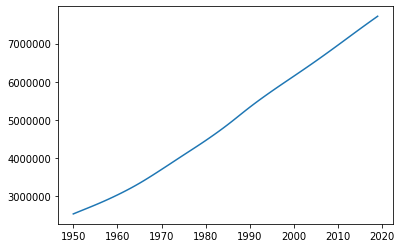

In [114]:
plt.plot(world_population[world_population.Year<2020].Year.values, 
         world_population[world_population.Year<2020].Value.values)
plt.show()

### Land Area Timeseries

In [199]:
land_df = pd.read_csv('data/raw_data/fao_data_land_data.csv')

#### Forest Area

In [99]:
forest_area_df = land_df[land_df.category=='forest_area']

In [101]:
forest_area_df.head()

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
45313,Afghanistan,11,Area,2007.0,1000 Ha,807.8,Fm,forest_area
45314,Afghanistan,11,Area,2006.0,1000 Ha,837.4,Fm,forest_area
45315,Afghanistan,11,Area,2005.0,1000 Ha,867.0,E,forest_area
45316,Afghanistan,11,Area,2004.0,1000 Ha,896.6,Fm,forest_area
45317,Afghanistan,11,Area,2003.0,1000 Ha,926.2,Fm,forest_area


In [102]:
world_forest = forest_area_df[forest_area_df.country_or_area=='World +']

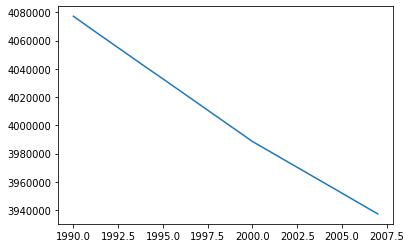

Number of square kilometers of forest area lost since 1990: 1399550


In [103]:
plt.plot(world_forest.year.values, 
         world_forest.value.values)
plt.show()
print('Number of square kilometers of forest area lost since 1990:', 
      10*int(world_forest.value.max() - world_forest.value.min())) # same as Peru

#### Agriculture Area

In [106]:
agriculture_df = land_df[land_df.category=='agricultural_area']

In [107]:
world_agriculture = agriculture_df[agriculture_df.country_or_area=='World +']

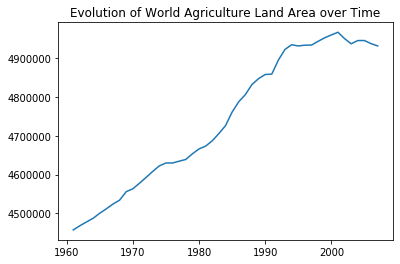

0.10651677417103993


In [200]:
plt.plot(world_agriculture.year.values, world_agriculture.value.values)
plt.title('Evolution of World Agriculture Land Area over Time')
plt.show()
print((world_agriculture[world_agriculture.year==world_agriculture.year.max()].value.values[0]
     - world_agriculture[world_agriculture.year==world_agriculture.year.min()].value.values[0])
     / world_agriculture[world_agriculture.year==world_agriculture.year.min()].value.values[0])

### Production Information

In [203]:
production_df = pd.read_csv('data/raw_data/fao_data_production_indices_data.csv')
production_df.head()

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2007.0,1000 Int. $,2486910.0,A,agriculture_pin
1,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2006.0,1000 Int. $,2278516.0,A,agriculture_pin
2,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2005.0,1000 Int. $,2524097.0,A,agriculture_pin
3,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2004.0,1000 Int. $,2226346.0,A,agriculture_pin
4,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2003.0,1000 Int. $,2289434.0,A,agriculture_pin


In [202]:
production_df[(production_df.country_or_area=='World +') 
              & (production_df.element=='Net per capita PIN (base 1999-2001)')
              & (production_df.category=='livestock_pin')].head()

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
253955,World +,438,Net per capita PIN (base 1999-2001),2007.0,Int. $,103.0,A,livestock_pin
253956,World +,438,Net per capita PIN (base 1999-2001),2006.0,Int. $,103.0,A,livestock_pin
253957,World +,438,Net per capita PIN (base 1999-2001),2005.0,Int. $,104.0,A,livestock_pin
253958,World +,438,Net per capita PIN (base 1999-2001),2004.0,Int. $,103.0,A,livestock_pin
253959,World +,438,Net per capita PIN (base 1999-2001),2003.0,Int. $,101.0,A,livestock_pin


### Emissions Information

In [204]:
energy_df = pd.read_csv('data/raw_data/Emissions_Agriculture_Energy_E_All_Data_(Norm).csv', encoding='latin-1')
energy_df.head()

,Country Code,Country,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,351,China,6801,Gas-Diesel oil,72184,Consumption in Agriculture,1986,1986,Terajoule,288659.0,Fc
1,351,China,6801,Gas-Diesel oil,72184,Consumption in Agriculture,1987,1987,Terajoule,313771.0,Fc
2,351,China,6801,Gas-Diesel oil,72184,Consumption in Agriculture,1988,1988,Terajoule,329896.0,Fc
3,351,China,6801,Gas-Diesel oil,72184,Consumption in Agriculture,1989,1989,Terajoule,355094.0,Fc
4,351,China,6801,Gas-Diesel oil,72184,Consumption in Agriculture,1990,1990,Terajoule,379045.0,Fc


In [205]:
total_CO2 = energy_df[(energy_df.Item=='Total Energy') 
                      & (energy_df.Element=='Emissions (CO2) (Energy)')
                      & (energy_df.Country=='World')]

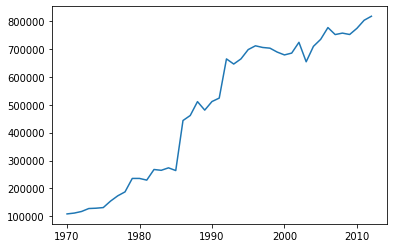

In [206]:
plt.plot(total_CO2.Year.values, total_CO2.Value.values)
plt.show()

In [207]:
continent_emissions = energy_df[(energy_df.Item=='Total Energy') 
                                & (energy_df.Element=='Emissions (CO2) (Energy)')
                                & (energy_df.Country.isin(continents))]

In [215]:
# year range
ind = list(range(continent_emissions.Year.min(), continent_emissions.Year.max()+1))

In [209]:
emission_datasets = [continent_emissions[continent_emissions.Country==CTR].Value.values for CTR in continents]

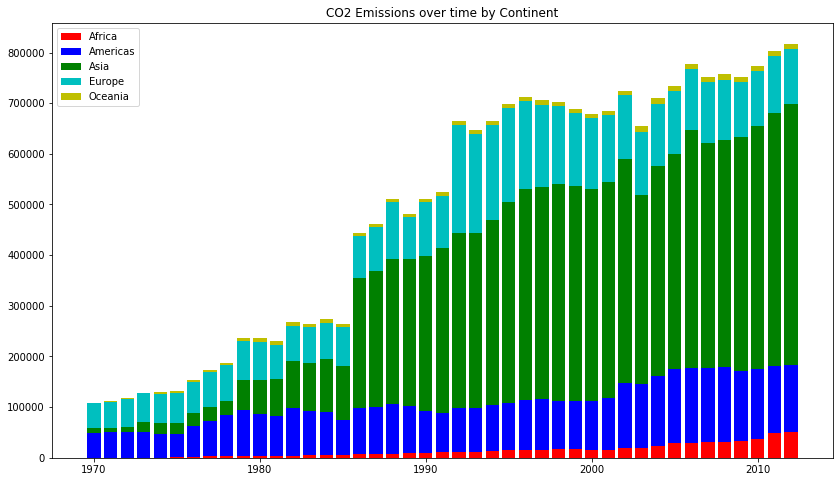

In [216]:
plt.figure(figsize=(14,8))
p1 = plt.bar(ind, emission_datasets[0], color='r', label=continents[0])
p2 = plt.bar(ind, emission_datasets[1], bottom=emission_datasets[0], color='b', label=continents[1])
p3 = plt.bar(ind, emission_datasets[2], bottom=emission_datasets[0]+emission_datasets[1], color='g', label=continents[2])
p4 = plt.bar(ind, emission_datasets[3], bottom=emission_datasets[0]+emission_datasets[1]+emission_datasets[2], color='c', label=continents[3])
p5 = plt.bar(ind, emission_datasets[4], bottom=emission_datasets[0]+emission_datasets[1]+emission_datasets[2]+emission_datasets[3], color='y', label=continents[4])
plt.legend()
plt.title('CO2 Emissions over time by Continent')
plt.show()

In [217]:
energy_df.Element.drop_duplicates()

0               Consumption in Agriculture
27         Implied emission factor for CH4
54                Emissions (CH4) (Energy)
81     Emissions (CO2eq) from CH4 (Energy)
108        Implied emission factor for N2O
135               Emissions (N2O) (Energy)
162    Emissions (CO2eq) from N2O (Energy)
189        Implied emission factor for CO2
216               Emissions (CO2) (Energy)
243             Emissions (CO2eq) (Energy)
Name: Element, dtype: object

In [218]:
energy_df.Item.drop_duplicates()

0                                          Gas-Diesel oil
270                                        Motor Gasoline
540                           Natural gas (including LNG)
740                         Liquefied petroleum gas (LPG)
940                                              Fuel oil
1210                                                 Coal
1480                                          Electricity
1867                    Gas-diesel oils used in fisheries
2287                           Fuel oil used in fisheries
2707                          Energy for power irrigation
2955    Transport fuel used in agriculture (excl. fish...
3249                                         Total Energy
3534                               Energy used in fishery
Name: Item, dtype: object

In [136]:
continents_ag_cons = energy_df[(energy_df.Element=='Consumption in Agriculture') 
                               & (energy_df.Country.isin(continents))
                               & (energy_df.Item=='Total Energy')]

In [137]:
dataset2 = [continents_ag_cons[continents_ag_cons.Country==CTR].Value.values for CTR in continents]

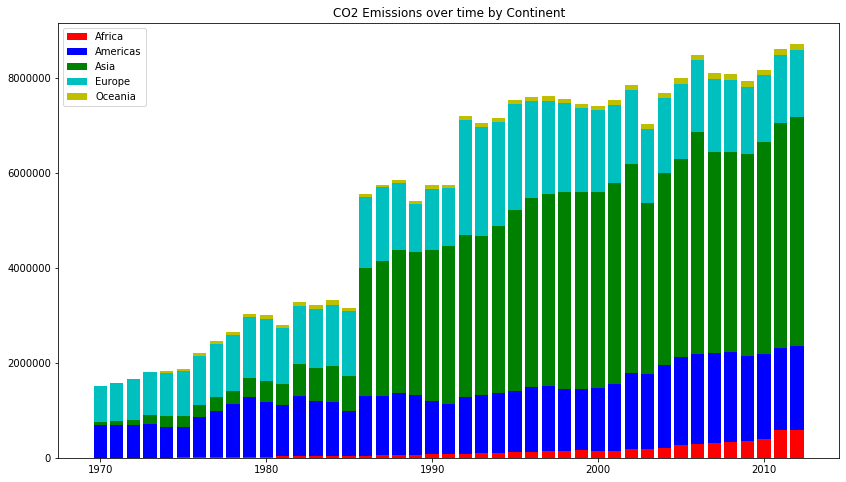

In [138]:
plt.figure(figsize=(14,8))
p1 = plt.bar(ind, dataset2[0], color='r', label=continents[0])
p2 = plt.bar(ind, dataset2[1], bottom=dataset2[0], color='b', label=continents[1])
p3 = plt.bar(ind, dataset2[2], bottom=dataset2[0]+dataset2[1], color='g', label=continents[2])
p4 = plt.bar(ind, dataset2[3], bottom=dataset2[0]+dataset2[1]+dataset2[2], color='c', label=continents[3])
p5 = plt.bar(ind, dataset2[4], bottom=dataset2[0]+dataset2[1]+dataset2[2]+dataset2[3], color='y', label=continents[4])
plt.legend()
plt.title('CO2 Emissions over time by Continent')
plt.show()

### Livestock

In [243]:
livestock_df = pd.read_csv('data/raw_data/Production_Livestock_E_All_Data_(Normalized).csv', encoding='latin-1')
livestock_df.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,1107,Asses,5111,Stocks,1961,1961,Head,1300000.0,NaN
1,2,Afghanistan,1107,Asses,5111,Stocks,1962,1962,Head,851850.0,NaN
2,2,Afghanistan,1107,Asses,5111,Stocks,1963,1963,Head,1001112.0,NaN
3,2,Afghanistan,1107,Asses,5111,Stocks,1964,1964,Head,1150000.0,F
4,2,Afghanistan,1107,Asses,5111,Stocks,1965,1965,Head,1300000.0,NaN


In [141]:
world_livestock = livestock_df[livestock_df.Area=='World']

In [142]:
world_cows = world_livestock[world_livestock.Item=='Cattle']

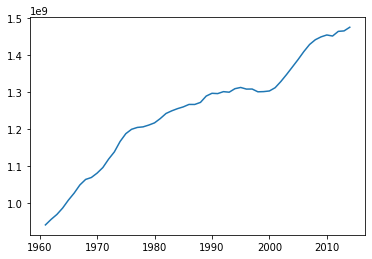

In [143]:
plt.plot(world_livestock[world_livestock.Item=='Cattle'].Year.values, 
         world_livestock[world_livestock.Item=='Cattle'].Value.values)
plt.show()

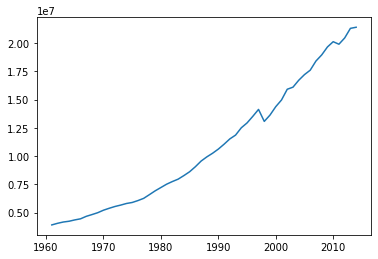

In [144]:
plt.plot(world_livestock[world_livestock.Item=='Chickens'].Year.values, 
         world_livestock[world_livestock.Item=='Chickens'].Value.values)
plt.show()

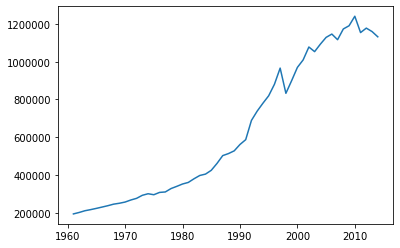

In [145]:
plt.plot(world_livestock[world_livestock.Item=='Ducks'].Year.values, 
         world_livestock[world_livestock.Item=='Ducks'].Value.values)
plt.show()

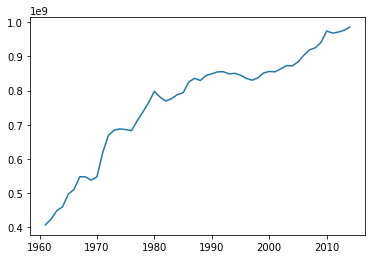

In [146]:
plt.plot(world_livestock[world_livestock.Item=='Pigs'].Year.values, 
         world_livestock[world_livestock.Item=='Pigs'].Value.values)
plt.show()

In [234]:
continent_ducks = livestock_df[(livestock_df.Item=='Cattle and Buffaloes') & (livestock_df.Area.isin(continents))]

In [235]:
dataset3 = [continent_ducks[continent_ducks.Area==CTR].Value.values for CTR in continents]

In [236]:
ind2 = range(continent_ducks.Year.min(), continent_ducks.Year.max()+1) 

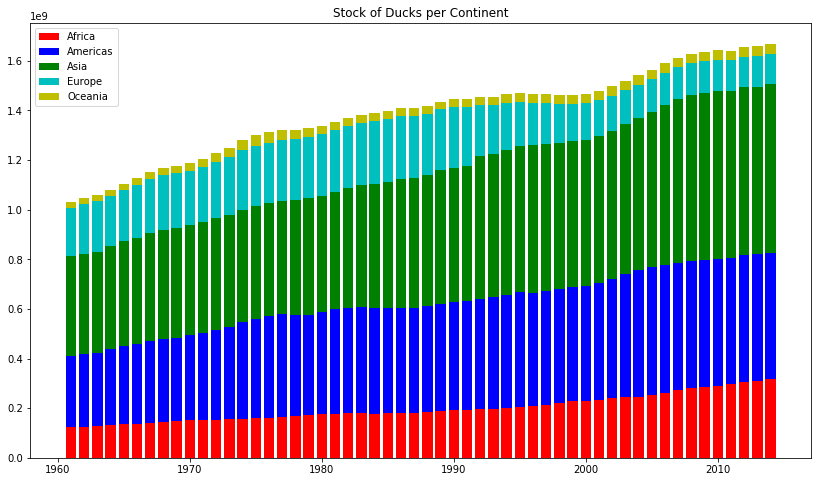

In [237]:
plt.figure(figsize=(14,8))
p1 = plt.bar(ind2, dataset3[0], color='r', label=continents[0])
p2 = plt.bar(ind2, dataset3[1], bottom=dataset3[0], color='b', label=continents[1])
p3 = plt.bar(ind2, dataset3[2], bottom=dataset3[0]+dataset3[1], color='g', label=continents[2])
p4 = plt.bar(ind2, dataset3[3], bottom=dataset3[0]+dataset3[1]+dataset3[2], color='c', label=continents[3])
p5 = plt.bar(ind2, dataset3[4], bottom=dataset3[0]+dataset3[1]+dataset3[2]+dataset3[3], color='y', label=continents[4])
plt.legend()
plt.title('Stock of Ducks per Continent')
plt.show()

In [ ]:
country_livestocks = livestock_df[livestock_df.Area.isin(countries)]

In [64]:
pop_and_livestock = pd.merge(cc_population_df, livestock_df[['Area', 'Year', 'Item', 'Value']], 
                             left_on=['Year', 'Country'], right_on=['Year', 'Area'], how='inner')

In [65]:
pop_and_livestock = pop_and_livestock.rename(columns={'Value': 'livestock_count'})

In [66]:
pop_and_livestock.head()

,Year,Continent,Country,Population,Area,Item,livestock_count
0,1961,Asia,Afghanistan,9166760.0,Afghanistan,Asses,1300000.0
1,1961,Asia,Afghanistan,9166760.0,Afghanistan,Camels,250000.0
2,1961,Asia,Afghanistan,9166760.0,Afghanistan,Cattle,2900000.0
3,1961,Asia,Afghanistan,9166760.0,Afghanistan,Chickens,4700.0
4,1961,Asia,Afghanistan,9166760.0,Afghanistan,Goats,4200000.0


In [67]:
pop_and_livestock_continent = pop_and_livestock.groupby(['Continent', 'Item', 'Year'], as_index=False).agg('sum')

In [68]:
pop_and_livestock_continent['livestock_pc'] = pop_and_livestock_continent.livestock_count/pop_and_livestock_continent.Population

In [238]:
continent_ducks_pc = pop_and_livestock_continent[(pop_and_livestock_continent.Item=='Cattle and Buffaloes')]

In [239]:
dataset4 = [continent_ducks_pc[continent_ducks_pc.Continent==CTR].livestock_pc.values for CTR in continents]

In [240]:
ind3 = range(continent_ducks_pc.Year.min(), continent_ducks_pc.Year.max()+1) 

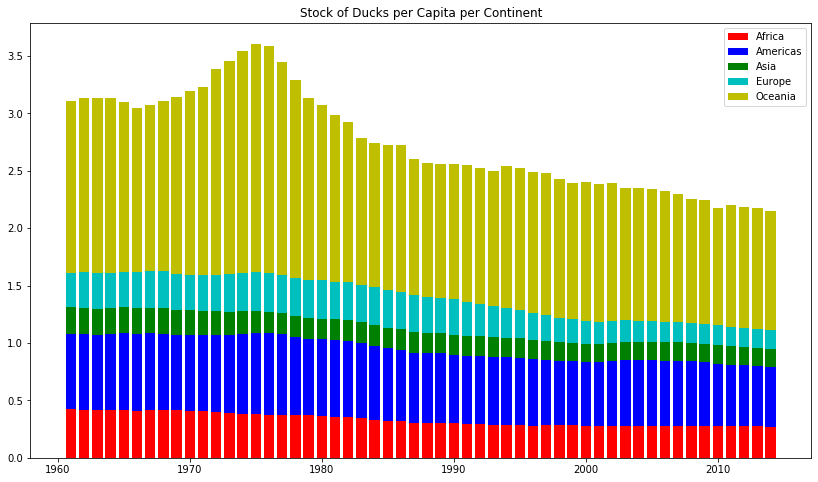

In [241]:
plt.figure(figsize=(14,8))
p1 = plt.bar(ind3, dataset4[0], color='r', label=continents[0])
p2 = plt.bar(ind3, dataset4[1], bottom=dataset4[0], color='b', label=continents[1])
p3 = plt.bar(ind3, dataset4[2], bottom=dataset4[0]+dataset4[1], color='g', label=continents[2])
p4 = plt.bar(ind3, dataset4[3], bottom=dataset4[0]+dataset4[1]+dataset4[2], color='c', label=continents[3])
p5 = plt.bar(ind3, dataset4[4], bottom=dataset4[0]+dataset4[1]+dataset4[2]+dataset4[3], color='y', label=continents[4])
plt.legend()
plt.title('Stock of Ducks per Capita per Continent')
plt.show()

### Livestock Problem

In [221]:
world_livestock.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
129665,5000,World,1171,Animals live nes,5111,Stocks,1961,1961,Head,415450.0,A
129666,5000,World,1171,Animals live nes,5111,Stocks,1962,1962,Head,587400.0,A
129667,5000,World,1171,Animals live nes,5111,Stocks,1963,1963,Head,587665.0,A
129668,5000,World,1171,Animals live nes,5111,Stocks,1964,1964,Head,510730.0,A
129669,5000,World,1171,Animals live nes,5111,Stocks,1965,1965,Head,255065.0,A


In [572]:
world_livestock.Year.max()

2014

In [573]:
world_livestock[world_livestock.Year==2014][['Item', 'Value']].sort_values('Value', ascending=False)

,Item,Value
130852,Sheep and Goats,2.206876e+09
130744,Cattle and Buffaloes,1.668990e+09
130042,Cattle,1.474527e+09
130636,Sheep,1.195625e+09
130258,Goats,1.011252e+09
130474,Pigs,9.856733e+08
129880,Buffaloes,1.944637e+08
129826,Beehives,8.344640e+07
130312,Horses,5.883222e+07
129772,Asses,4.276190e+07


### Emissions by sector

In [503]:
emissions_by_sector = pd.read_csv('data/raw_data/Environment_Emissions_by_Sector_E_All_Data_(Normalized).csv', 
                                  encoding='latin-1')
emissions_by_sector.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,6814,"Energy (energy, manufacturing and construction...",7231,Emissions (CO2eq),1990,1990,Gigagrams,943.2945,A
1,2,Afghanistan,6814,"Energy (energy, manufacturing and construction...",7231,Emissions (CO2eq),1991,1991,Gigagrams,1022.1110,A
2,2,Afghanistan,6814,"Energy (energy, manufacturing and construction...",7231,Emissions (CO2eq),1992,1992,Gigagrams,542.7868,A
3,2,Afghanistan,6814,"Energy (energy, manufacturing and construction...",7231,Emissions (CO2eq),1993,1993,Gigagrams,548.8871,A
4,2,Afghanistan,6814,"Energy (energy, manufacturing and construction...",7231,Emissions (CO2eq),1994,1994,Gigagrams,537.9067,A


In [355]:
emissions_by_sector.Item.drop_duplicates()

0         Energy (energy, manufacturing and construction...
273                                               Transport
546          Residential, commercial, institutional and AFF
819                    Industrial processes and product use
987                                                   Waste
1260                                          Other sources
1470                                      Agriculture total
1743                                       Land use sources
1988                                                 Forest
2093                                           Energy total
2366                                         Land Use total
2471                                          Sources total
2744                              Sources total excl. AFOLU
697003                                International bunkers
Name: Item, dtype: object

In [356]:
emissions_by_sector.Element.drop_duplicates()

0                                Emissions (CO2eq)
21                      Emissions (CO2eq) from CO2
42                      Emissions (CO2eq) from CH4
63                      Emissions (CO2eq) from N2O
84                  Emissions (CO2eq) from F-gases
105             Share of sector in total emissions
126         Share of sector in total CO2 emissions
147         Share of sector in total CH4 emissions
168         Share of sector in total N2O emissions
189               Share of CO2 in sector emissions
210               Share of CH4 in sector emissions
231               Share of N2O in sector emissions
252           Share of F-gases in sector emissions
3206    Share of sector in total F-gases emissions
Name: Element, dtype: object

In [511]:
test = emissions_by_sector[(emissions_by_sector.Element=='Share of sector in total emissions')
                           & (emissions_by_sector.Area=='World')
                           & (emissions_by_sector.Year==emissions_by_sector.Year.max())]
test.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
695364,5000,World,6814,"Energy (energy, manufacturing and construction...",7263,Share of sector in total emissions,2010,2010,%,47.0381,Fc
695658,5000,World,6815,Transport,7263,Share of sector in total emissions,2010,2010,%,11.2195,Fc
695952,5000,World,6816,"Residential, commercial, institutional and AFF",7263,Share of sector in total emissions,2010,2010,%,7.5779,Fc
696246,5000,World,6817,Industrial processes and product use,7263,Share of sector in total emissions,2010,2010,%,7.0174,Fc
696540,5000,World,6818,Waste,7263,Share of sector in total emissions,2010,2010,%,2.9264,Fc


In [526]:
s = test.iloc[:-3]

In [532]:
s = s.sort_values('Item')

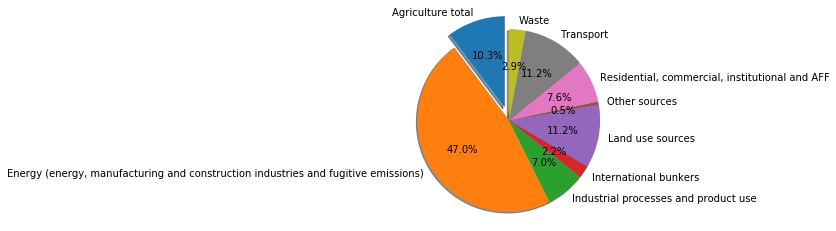

In [536]:
fig1, ax1 = plt.subplots()
ax1.pie(s.Value.values, explode=(0.15,0,0,0,0,0,0,0,0), labels=s.Item.values, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [504]:
country_emissions_agp = emissions_by_sector[(emissions_by_sector.Element=='Share of sector in total emissions')
                                            & (emissions_by_sector.Item=='Agriculture total')
                                            & (emissions_by_sector.Area.isin(countries))]

In [501]:
import folium
world_map = 'data/maps/world_countries.json'
mapp = folium.Map(location=[40, 15], zoom_start=2)

In [397]:
country_metadata.head()

,Country Group Code,Country Group,Country Code,Country,M49 Code,ISO2 Code,ISO3 Code
0,5100,Africa,4,Algeria,12.0,DZ,DZA
1,5100,Africa,7,Angola,24.0,AO,AGO
2,5100,Africa,53,Benin,204.0,BJ,BEN
3,5100,Africa,20,Botswana,72.0,BW,BWA
4,5100,Africa,233,Burkina Faso,854.0,BF,BFA


In [505]:
map_df = pd.merge(country_emissions_agp[country_emissions_agp.Year==country_emissions_agp.Year.max()][['Area', 'Value']], 
                  country_metadata[['Country', 'ISO3 Code']].drop_duplicates(), 
                  left_on='Area', right_on='Country', how='left')

In [506]:
map_df = map_df[['Country', 'Value', 'ISO3 Code']]

In [507]:
map_df.loc[map_df.shape[0]+1] = ['Somaliland', map_df[map_df.Country=='Somalia'].Value.values[0], '-99']
map_df.loc[map_df.shape[0]+1] = ['Sudan', map_df[map_df.Country=='Sudan (former)'].Value.values[0], 'SDN']
map_df.loc[map_df.shape[0]+1] = ['South Sudan', map_df[map_df.Country=='Sudan (former)'].Value.values[0], 'SDS']
map_df = map_df[map_df.Country!='Sudan (former)']

In [508]:
import json
with open(world_map) as json_file:
    data = json.load(json_file)
    
c2id = []
for row in data['features']:
    c2id.append([row['properties'].get('name'), row.get('id')])
    
c2id = pd.DataFrame(c2id, columns=['Country', 'Code'])

In [509]:
mapp.choropleth(geo_data=world_map, data=map_df,
                columns=['ISO3 Code', 'Value'],
                key_on='feature.id',
                fill_color='YlGn', fill_opacity=0.9, line_opacity=0.2,
                nan_fill_color='grey',
                legend_name='Participation Rate (%)')
mapp

In [538]:
energy_df.head()

,Country Code,Country,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,351,China,6801,Gas-Diesel oil,72184,Consumption in Agriculture,1986,1986,Terajoule,288659.0,Fc
1,351,China,6801,Gas-Diesel oil,72184,Consumption in Agriculture,1987,1987,Terajoule,313771.0,Fc
2,351,China,6801,Gas-Diesel oil,72184,Consumption in Agriculture,1988,1988,Terajoule,329896.0,Fc
3,351,China,6801,Gas-Diesel oil,72184,Consumption in Agriculture,1989,1989,Terajoule,355094.0,Fc
4,351,China,6801,Gas-Diesel oil,72184,Consumption in Agriculture,1990,1990,Terajoule,379045.0,Fc


In [540]:
energy_df.Element.drop_duplicates()

0               Consumption in Agriculture
27         Implied emission factor for CH4
54                Emissions (CH4) (Energy)
81     Emissions (CO2eq) from CH4 (Energy)
108        Implied emission factor for N2O
135               Emissions (N2O) (Energy)
162    Emissions (CO2eq) from N2O (Energy)
189        Implied emission factor for CO2
216               Emissions (CO2) (Energy)
243             Emissions (CO2eq) (Energy)
Name: Element, dtype: object

In [542]:
energy_df[energy_df.Element=='Consumption in Agriculture'].Item.drop_duplicates()

0                                          Gas-Diesel oil
270                                        Motor Gasoline
540                           Natural gas (including LNG)
740                         Liquefied petroleum gas (LPG)
940                                              Fuel oil
1210                                                 Coal
1480                                          Electricity
1867                    Gas-diesel oils used in fisheries
2287                           Fuel oil used in fisheries
2707                          Energy for power irrigation
2955    Transport fuel used in agriculture (excl. fish...
3249                                         Total Energy
3534                               Energy used in fishery
Name: Item, dtype: object

In [554]:
tt = energy_df[(energy_df.Country=='China') & (energy_df.Year==2000)]
tt[tt.duplicated()]

,Country Code,Country,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag


In [555]:
tt[(tt.Item=='Electricity') & (tt.Element=='Consumption in Agriculture')]

,Country Code,Country,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
1540,351,China,6807,Electricity,72184,Consumption in Agriculture,2000,2000,Terajoule,242265.6,A
1541,351,China,6807,Electricity,72182,Consumption in Agriculture,2000,2000,million kWh,67296.0,A


In [560]:
t = energy_df[(energy_df.Country=='China') & (energy_df.Year==2000)][['Item', 'Element', 'Value', 'Unit']]\
.groupby(['Item', 'Element', 'Unit'], as_index=False).agg('sum')

In [563]:
t.Unit.drop_duplicates()

0       Terajoule
1       Gigagrams
7           Kg/TJ
11    million kWh
Name: Unit, dtype: object

In [570]:
t[t.Unit=='Terajoule'].Item.drop_duplicates()

0                                                   Coal
10                                           Electricity
19                           Energy for power irrigation
27                                Energy used in fishery
34                                              Fuel oil
44                            Fuel oil used in fisheries
54                                        Gas-Diesel oil
64                     Gas-diesel oils used in fisheries
74                         Liquefied petroleum gas (LPG)
84                                        Motor Gasoline
94                           Natural gas (including LNG)
104                                         Total Energy
111    Transport fuel used in agriculture (excl. fish...
Name: Item, dtype: object

In [571]:
t[t.Unit=='Terajoule'].Element.drop_duplicates()

0    Consumption in Agriculture
Name: Element, dtype: object

### Temperature Change

In [298]:
temperatures = pd.read_csv('data/raw_data/Environment_Temperature_change_E_All_Data_(Normalized).csv', encoding='latin-1')

In [299]:
temperatures.head()

,Area Code,Area,Months Code,Months,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,7001,January,7271,Temperature change,1961,1961,°C,0.968,Fc
1,2,Afghanistan,7001,January,7271,Temperature change,1962,1962,°C,0.119,Fc
2,2,Afghanistan,7001,January,7271,Temperature change,1963,1963,°C,2.434,Fc
3,2,Afghanistan,7001,January,7271,Temperature change,1964,1964,°C,-5.381,Fc
4,2,Afghanistan,7001,January,7271,Temperature change,1965,1965,°C,2.267,Fc


Temperature anomalies (i.e. the Value column) indicate how much warmer or colder it is than normal for a particular place and time. Normal always means the average over the 30-year period 1951-1980 for that place and time of year.

In [305]:
world_temperatures_changes = temperatures[(temperatures.Area=='World') 
                                          & (temperatures.Months=='Meteorological year') 
                                          & (temperatures.Element=='Temperature change') ]

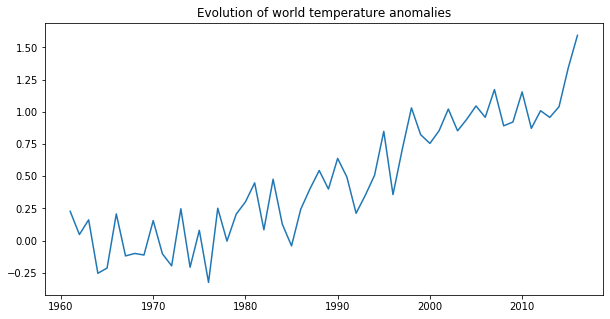

In [352]:
plt.figure(figsize=(10,5))
plt.plot(world_temperatures_changes.Year.values, world_temperatures_changes.Value.values)
plt.title('Evolution of world temperature anomalies')
plt.show()

In [332]:
temperatures[(temperatures.Year==temperatures.Year.max()) & (temperatures.Area=='World') 
             & (temperatures['Months Code']<7013) & (temperatures.Element=='Temperature change')]

,Area Code,Area,Months Code,Months,Element Code,Element,Year Code,Year,Unit,Value,Flag
447495,5000,World,7001,January,7271,Temperature change,2016,2016,°C,1.722,Fc
447607,5000,World,7002,February,7271,Temperature change,2016,2016,°C,2.609,Fc
447719,5000,World,7003,March,7271,Temperature change,2016,2016,°C,2.449,Fc
447831,5000,World,7004,April,7271,Temperature change,2016,2016,°C,1.961,Fc
447943,5000,World,7005,May,7271,Temperature change,2016,2016,°C,1.213,Fc
448055,5000,World,7006,June,7271,Temperature change,2016,2016,°C,1.253,Fc
448167,5000,World,7007,July,7271,Temperature change,2016,2016,°C,1.244,Fc
448279,5000,World,7008,August,7271,Temperature change,2016,2016,°C,1.420,Fc
448391,5000,World,7009,September,7271,Temperature change,2016,2016,°C,1.294,Fc
448503,5000,World,7010,October,7271,Temperature change,2016,2016,°C,0.872,Fc


In [338]:
temperatures[(temperatures.Area=='World') 
             & (temperatures.Element=='Temperature change') 
             & (temperatures['Months Code']<7013)][['Months', 'Months Code', 'Value']] \
.groupby(['Months']) \
.agg('max') \
.sort_values('Months Code')

,Months Code,Value
Months,,
January,7001,2.036
February,7002,2.609
March,7003,2.449
April,7004,1.961
May,7005,1.344
June,7006,1.305
July,7007,1.244
August,7008,1.420
September,7009,1.294


In [344]:
continent_temperatures = temperatures[(temperatures.Area.isin(continents)) 
                                      & (temperatures.Element=='Temperature change')
                                      & (temperatures.Months=='Meteorological year')]

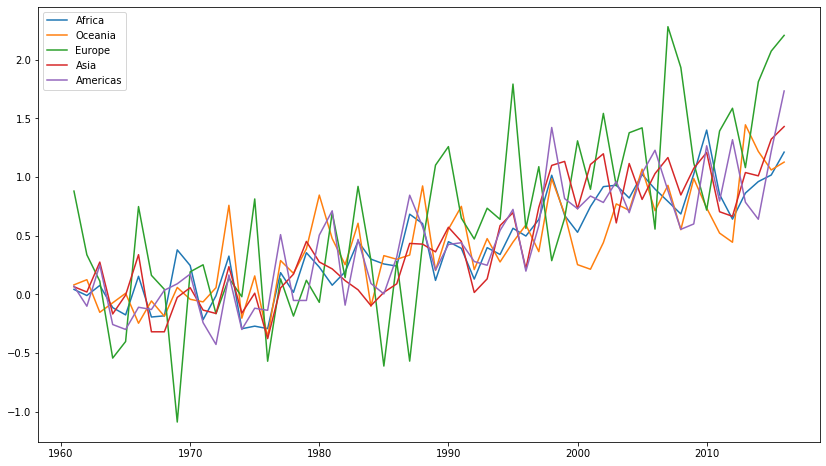

In [351]:
plt.figure(figsize=(14,8))
plt.plot(continent_temperatures[continent_temperatures.Area=='Africa'].Year.values,
         continent_temperatures[continent_temperatures.Area=='Africa'].Value.values, label='Africa')

plt.plot(continent_temperatures[continent_temperatures.Area=='Oceania'].Year.values,
         continent_temperatures[continent_temperatures.Area=='Oceania'].Value.values, label='Oceania')

plt.plot(continent_temperatures[continent_temperatures.Area=='Europe'].Year.values,
         continent_temperatures[continent_temperatures.Area=='Europe'].Value.values, label='Europe')

plt.plot(continent_temperatures[continent_temperatures.Area=='Asia'].Year.values,
         continent_temperatures[continent_temperatures.Area=='Asia'].Value.values, label='Asia')

plt.plot(continent_temperatures[continent_temperatures.Area=='Americas'].Year.values,
         continent_temperatures[continent_temperatures.Area=='Americas'].Value.values, label='Americas')

plt.legend()
plt.show()